In [29]:
import numpy as np
from skimage.io import imread
import pyclesperanto_prototype as cle
import oclrfc
import napari
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

cle.select_device("RTX")

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (2 refs)>

The example data is available from https://git.mpi-cbg.de/rhaase/clij2_example_data

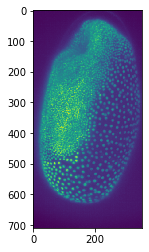

In [30]:
tribolium = cle.push(imread("../../data/clij2_example_data/lund1051_resampled.tif"))
cle.imshow(tribolium)

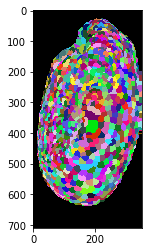

In [31]:
cells = cle.push(imread("../../data/clij2_example_data/lund1051_labelled.tif"))
cle.imshow(cells, labels=True)

The classifier was trained interactively using [napari-oclrfc](https://github.com/haesleinhuepf/napari-oclrfc).

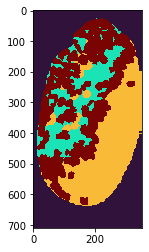

In [34]:
classifier = oclrfc.OCLRandomForestLabelClassifier("triple_label_classifier.cl")

cell_classification = classifier.predict(cells, tribolium)

cle.imshow(cell_classification, color_map='turbo')

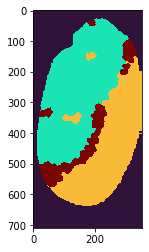

In [35]:
corrected_classification = cle.mode_of_proximal_neighbors_map(cell_classification, cells, max_distance=50)

cle.imshow(corrected_classification, color_map='turbo')

Text(0.5, 1.0, 'Corrected cell classification')

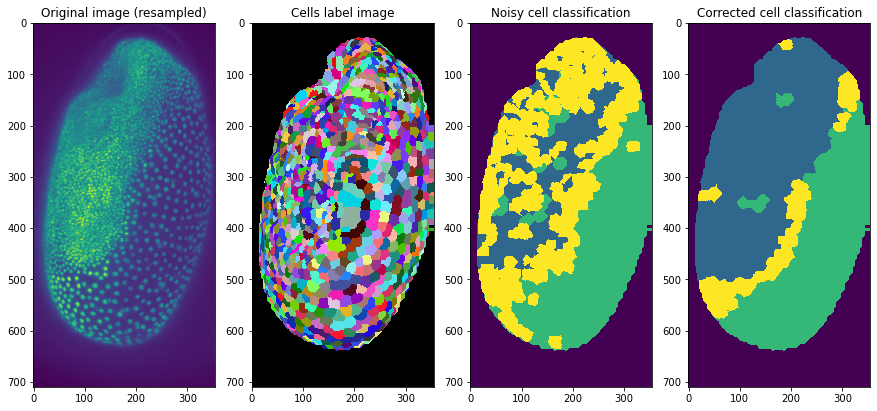

In [36]:
fig, axs = plt.subplots(1, 4, figsize=(15,7))

cle.imshow(tribolium, plot=axs[0])
axs[0].set_title('Original image (resampled)')
cle.imshow(cells, labels=True, plot=axs[1])
axs[1].set_title('Cells label image')
cle.imshow(cell_classification, plot=axs[2])
axs[2].set_title('Noisy cell classification')
cle.imshow(corrected_classification, plot=axs[3])
axs[3].set_title('Corrected cell classification')

In [37]:
fig.savefig("tribolium_mode_cell_classification.png", dpi=400, bbox_inches = 'tight', pad_inches=0.1)